In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
data_dir = '/content/drive/MyDrive/مجلد بلا عنوان/Dataset_BUSI_with_GT'

In [ ]:
# Working on 128 * 128 images, batch = 32 images each
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
# Training data -> 80%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 2 classes.
Using 624 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 2 classes.
Using 156 files for validation.


In [ ]:
# Printing& storing classs names 'labels' to use later.
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


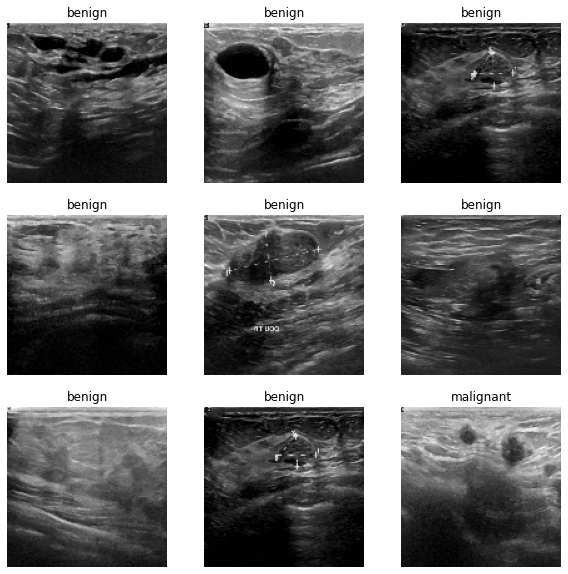

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
# Configrations for more performance, keeping images in memory, just for my Potato PC :')
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Building CNN model using Conv2D 
num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
# Compiling 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Printing model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
epochs=30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 18s 650ms/step - loss: 0.6412 - accuracy: 0.6955 - val_loss: 0.5061 - val_accuracy: 0.7821
Epoch 2/30
20/20 [==============================] - 12s 582ms/step - loss: 0.5748 - accuracy: 0.7179 - val_loss: 0.4808 - val_accuracy: 0.7821
Epoch 3/30
20/20 [==============================] - 12s 581ms/step - loss: 0.5475 - accuracy: 0.7179 - val_loss: 0.5898 - val_accuracy: 0.7821
Epoch 4/30
20/20 [==============================] - 12s 581ms/step - loss: 0.5285 - accuracy: 0.7452 - val_loss: 0.5174 - val_accuracy: 0.8013
Epoch 5/30
20/20 [==============================] - 12s 582ms/step - loss: 0.4793 - accuracy: 0.7853 - val_loss: 0.3788 - val_accuracy: 0.8462
Epoch 6/30
20/20 [==============================] - 12s 584ms/step - loss: 0.4516 - accuracy: 0.7901 - val_loss: 0.3964 - val_accuracy: 0.8333
Epoch 7/30
20/20 [==============================] - 12s 588ms/step - loss: 0.4206 - accuracy: 0.8429 - val_loss: 0.3806 - val_accuracy: 0.8141
Epoch 8/30

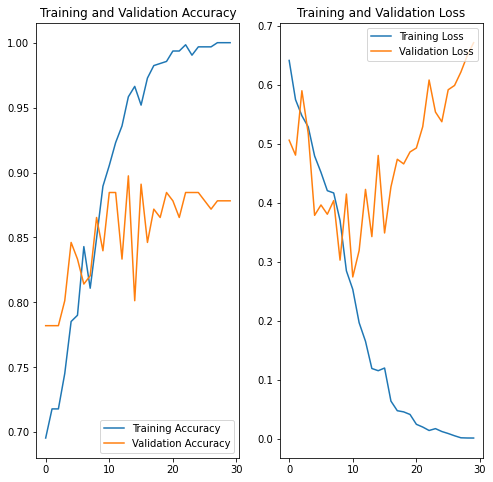

In [ ]:
#Playing with subplot Visualizer, Accuracy vs Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# data augmentation, 
#data_augmentation = keras.Sequential(
 # [
  #  tf.keras.layers.RandomFlip("horizontal",
   #                   input_shape=(img_height,
    #                              img_width,
     #                             3)),
    #tf.keras.layers.RandomRotation(0.1),
    #tf.keras.layers.RandomZoom(0.1),
  #]
#)

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

In [ ]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

z_dim = 100

In [ ]:
def generator(img_shape, z_dim):
    
    model = Sequential()
    
    # Hidden layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(img_shape))

    z = Input(shape=(z_dim,))
    img = model(z)

    return Model(z, img)

In [ ]:
def discriminator(img_shape):
    
    model = Sequential()

    model.add(Flatten(input_shape=img_shape))

    # Hidden layer
    model.add(Dense(128))

    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.01))
    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    img = Input(shape=img_shape)
    prediction = model(img)

    return Model(img, prediction)

In [ ]:
discriminator = discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', 
                      optimizer=Adam(), metrics=['accuracy'])

# Build the Generator
generator = generator(img_shape, z_dim)

# Generated image to be used as input
z = Input(shape=(100,))
img = generator(z)

# Keep Discriminator’s parameters constant during Generator training
discriminator.trainable = False

# The Discriminator’s prediction
prediction = discriminator(img)

# Combined GAN model to train the Generator
combined = Model(z, prediction)
combined.compile(loss='binary_crossentropy', optimizer=Adam())

In [ ]:
losses = []
accuracies = []

def train(iterations, batch_size, sample_interval):
    
    # Load the dataset
    #path = "C:\\Users\\hgani\\Desktop\\CARLIFE DATA\\carlife_all_data\\Carlife_jpg"
    #X_train = cv2.imread(path + '\\'+ str(i) for i in os.listdir(path))
    (X_train, _), (_, _) = mnist.load_data()
    data_slice = 3000
    X_train = X_train[:data_slice,:]
    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real and fake examples
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        
        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Select a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Discriminator loss
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Generator loss
        g_loss = combined.train_on_batch(z, real)

        if iteration % sample_interval == 0:
            
            # Output training progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % 
                         (iteration, d_loss[0], 100*d_loss[1], g_loss))
            
            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss[0], g_loss))
            accuracies.append(100*d_loss[1])

            # Output generated image samples 
            sample_images(iteration)

In [ ]:
def sample_images(iteration, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, 
              (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise 
    gen_imgs = generator.predict(z)

    # Rescale images to 0-1
    gen_imgs = 0.5 * gen_imgs + 0.5

    
    # Set image grid
    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, 
                                    figsize=(4,4), sharey=True, sharex=True)
    
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output image grid
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1

11501568/11490434 [==============================] - 0s 0us/step
0 [D loss: 0.530704, acc.: 57.03%] [G loss: 0.774333]
1000 [D loss: 0.070480, acc.: 98.44%] [G loss: 4.365432]
2000 [D loss: 0.187927, acc.: 92.19%] [G loss: 6.353850]
3000 [D loss: 0.131158, acc.: 94.53%] [G loss: 7.176371]
4000 [D loss: 0.112118, acc.: 96.88%] [G loss: 5.430758]
5000 [D loss: 0.110533, acc.: 95.70%] [G loss: 5.914009]
6000 [D loss: 0.259807, acc.: 90.23%] [G loss: 4.904741]
7000 [D loss: 0.152120, acc.: 92.97%] [G loss: 4.356889]
8000 [D loss: 0.253982, acc.: 88.28%] [G loss: 4.592851]
9000 [D loss: 0.192422, acc.: 92.19%] [G loss: 4.837184]
10000 [D loss: 0.235431, acc.: 90.62%] [G loss: 5.257691]
11000 [D loss: 0.295244, acc.: 88.67%] [G loss: 4.390982]
12000 [D loss: 0.283164, acc.: 89.84%] [G loss: 4.379407]
13000 [D loss: 0.365307, acc.: 83.20%] [G loss: 3.046355]
14000 [D loss: 0.321879, acc.: 85.94%] [G loss: 3.327363]
15000 [D loss: 0.265086, acc.: 86.72%] [G loss: 3.233323]
16000 [D loss: 0.239

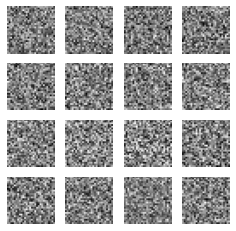

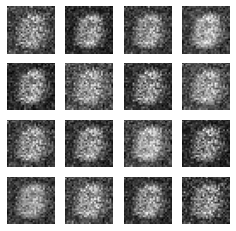

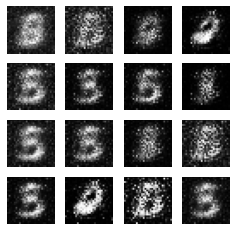

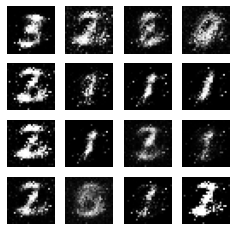

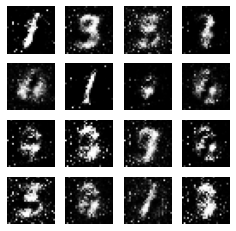

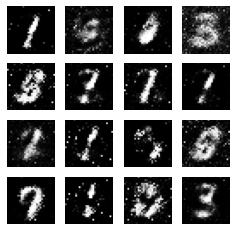

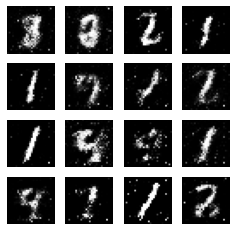

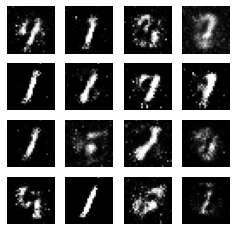

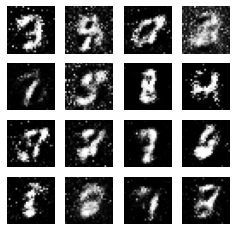

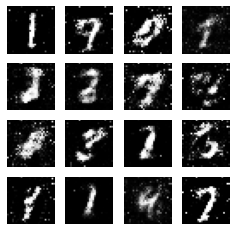

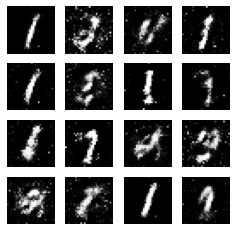

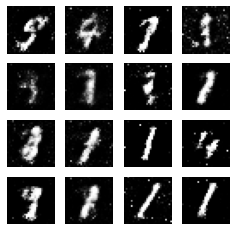

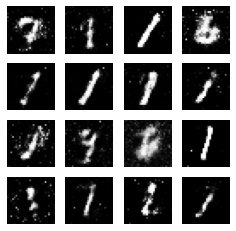

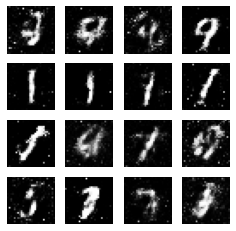

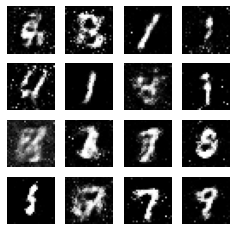

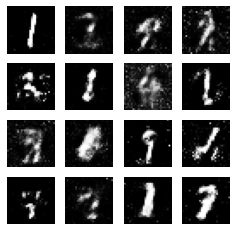

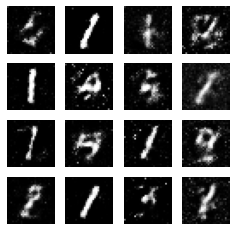

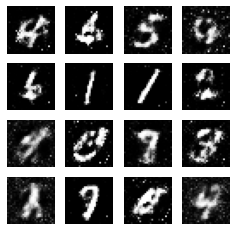

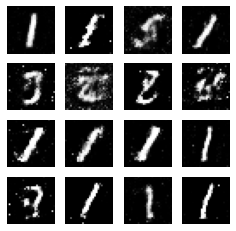

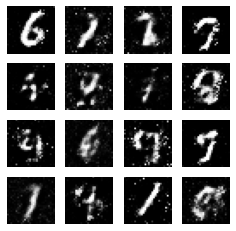

In [ ]:
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

In [ ]:
##for f1 in range (780):
 # img= cv2.imread(f1)
  ##v=img
##img= cv2.imread("../input/train/train/00b4dfbb267109b5f0d0dde365fa6161.jpg",1)
#img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
##plt.imshow(images[0].numpy().astype("uint8"))

In [ ]:
# Showing how data agumentation affects the same image
##plt.figure(figsize=(10, 10))
##for images, _ in train_ds.take(1):
##  for i in range(9):
  ##  augmented_images = data_augmentation(images)
   ## ax = plt.subplot(3, 3, i + 1)
    ##plt.imshow(augmented_images[0].numpy().astype("uint8"))
    ##plt.axis("off")

In [ ]:
# new model using Dropout
model = Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
# Plotting again to see new results visualized:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Working on 128 * 128 images, batch = 32 images each
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Training data -> 80%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
import numpy as np
from keras import layers
import keras.applications.resnet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools
%matplotlib inline

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
from keras.applications.densenet import DenseNet201, DenseNet121

K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


 


model = build_model(resnet ,lr = 1e-4)
model.summary()

In [ ]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
20/20 [==============================] - 13s 626ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6963 - val_accuracy: 0.8718
Epoch 2/5
20/20 [==============================] - 20s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6768 - val_accuracy: 0.8846
Epoch 3/5
20/20 [==============================] - 15s 721ms/step - loss: 0.0030 - accuracy: 0.9984 - val_loss: 0.7363 - val_accuracy: 0.8718
Epoch 4/5
20/20 [==============================] - 12s 588ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.6750 - val_accuracy: 0.8974
Epoch 5/5
20/20 [==============================] - 12s 589ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.6777 - val_accuracy: 0.8910
